In [187]:
import matplotlib.pyplot as plt
import numpy as np

In [188]:
g = 9.8
tt = []
t_dot = []

In [189]:
#variables to initialize
L = 1  # length of pendulum
mu = 0.1   # air resistance
THETA_0 = np.pi/3 # initial angle
THETA_DOT_0 = 7 # initial angular velocity

In [190]:
# Definition of ODE
def get_theta_double_dot(theta, theta_dot):
    return -mu*theta_dot-(g/L)*np.sin(theta)

In [191]:
# Solution to the differential equation
def theta(t):
    # Initialize changing values
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = 0.001 # some time step
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta += theta_dot * delta_t
        tt.append(theta)
        theta_dot += theta_double_dot * delta_t
        t_dot.append(theta_dot)
        #print(time,theta,theta_dot,theta_double_dot)
    return theta, theta_dot, theta_double_dot

In [192]:
# spiral
lastcoord=theta(50)

In [193]:
# phase space X=theta, Y=U=theta_dot, V=theta_double_dot
span=np.pi
last_theta=abs(lastcoord[0])
scale=(last_theta)//3+1  #scaling xAxis on last value of theta
density=30
X, Y = np.meshgrid(np.linspace(-span, scale*span, density), 
                   np.linspace(-span,max(THETA_DOT_0,span), density))
U = Y
V = get_theta_double_dot(X,Y)

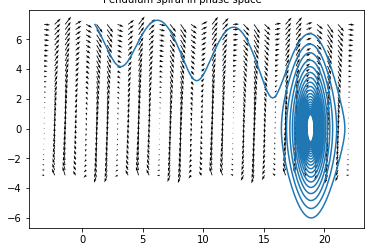

In [194]:
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, units='width')
ax.quiverkey(q, X=0.2, Y=1.05, U=0, label='Pendulum spiral in phase space', labelpos='E')
ax.plot(tt,t_dot)
#plt.title('Pendulum spiral in phase space')

In [195]:
print(lastcoord)
print(last_theta//(2*np.pi))

(18.569310200425452, 0.07194505688654614, 2.7043275673739355)
2.0
